# Experiment 1 — Cycle Probability vs Number of Edges

## Objective

Estimate the probability that a randomly generated undirected graph contains a cycle as the number of edges increases.

---

## Method

For each edge count $e$, we generate $m$ random undirected graphs with:

- $n = 100$ nodes  
- $e$ edges  
- no self-loops  
- no duplicate edges (no "multiples" of the same edge)

For each generated graph $G$, we call `has_cycle(G)` and record whether a cycle exists.

The estimated probability is:

$$
\hat{p}(e) = \frac{\#\{G \text{ with a cycle}\}}{m}
$$

---

## Parameters Used

- Number of nodes: $n = 100$
- Edge counts tested: $e \in \{0, 25, 50, \dots, 500\}$
- Trials per edge count: $m = 200$

---

## Output

A plot of $\hat{p}(e)$ (cycle probability) versus the number of edges.

**Note:** The handout mentions that we *could* use edge proportion instead of number of edges to compare multiple values of $n$ on the same graph.  
In this experiment, we kept $n = 100$ fixed and used number of edges on the x-axis.


In [1]:
from graph import Graph, has_cycle, create_random_graph

In [2]:
def experiment1(num_nodes=100, edge_values=None, trials=200):
    if edge_values is None:
        edge_values = list(range(0, 501, 25))

    results = []
    for e in edge_values:
        cycle_count = 0
        for _ in range(trials):
            G = create_random_graph(num_nodes, e)
            if has_cycle(G):
                cycle_count += 1
        results.append((e, cycle_count / trials))
    return results

results = experiment1()
results[:5]


[(0, 0.0), (25, 0.03), (50, 0.345), (75, 0.985), (100, 1.0)]

In [3]:
results = experiment1(num_nodes=100, edge_values=list(range(0, 501, 25)), trials=200)
results


[(0, 0.0),
 (25, 0.05),
 (50, 0.35),
 (75, 0.985),
 (100, 1.0),
 (125, 1.0),
 (150, 1.0),
 (175, 1.0),
 (200, 1.0),
 (225, 1.0),
 (250, 1.0),
 (275, 1.0),
 (300, 1.0),
 (325, 1.0),
 (350, 1.0),
 (375, 1.0),
 (400, 1.0),
 (425, 1.0),
 (450, 1.0),
 (475, 1.0),
 (500, 1.0)]

<>:12: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
<>:12: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
/var/folders/wg/dzcw1_x50l7ch3p5lclcjp940000gn/T/ipykernel_15222/1433494009.py:12: SyntaxWarning: "\e" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\e"? A raw string is also an option.
  plt.savefig("images\exp1_cycle_probability.png", dpi=300, bbox_inches="tight")


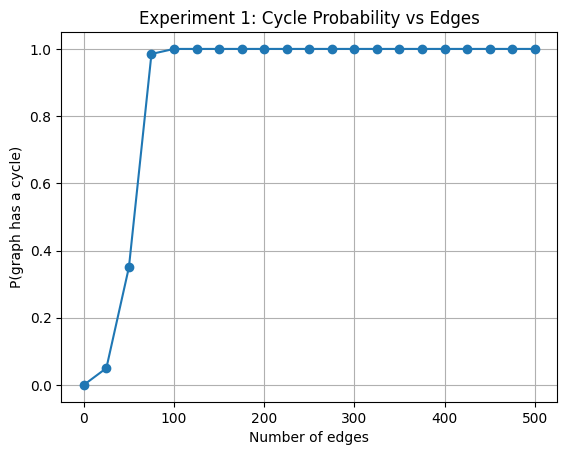

In [ ]:
import matplotlib.pyplot as plt

edges = [e for e, p in results]
probs = [p for e, p in results]

plt.figure()
plt.plot(edges, probs, marker='o')
plt.xlabel("Number of edges")
plt.ylabel("P(graph has a cycle)")
plt.title("Experiment 1: Cycle Probability vs Edges")
plt.grid(True)
plt.savefig("images/exp1_cycle_probability.png", dpi=300, bbox_inches="tight")
plt.show()


### Conclusion (Experiment 1: Cycle Probability vs Edges)

When the number of edges is small, the probability of a cycle is near 0. As edges increase, the probability rises sharply: in our trials with `n = 100`, the probability jumps from low values around `e = 50` to nearly 1 by about `e = 75–100`. After that point the probability stays essentially 1, since a graph with many edges is very likely to contain at least one cycle.

